In [1]:
import python_inventory as pyinv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("data/starsCYG.csv", sep=",")
df

,id,log.Te,log.light
0,1,4.37,5.23
1,2,4.56,5.74
2,3,4.26,4.93
3,4,4.56,5.74
4,5,4.30,5.19
5,6,4.46,5.46
6,7,3.84,4.65
7,8,4.57,5.27
8,9,4.26,5.57
9,10,4.37,5.12


In [4]:
log_Te = df['log.Te'].values
log_light = df['log.light'].values

X = log_Te
Xs = X.reshape(-1,1)
Y = log_light

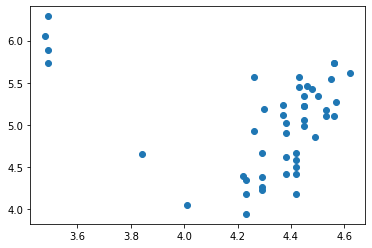

In [5]:
plt.scatter(X, Y)
plt.show()

In [6]:
line = pyinv.LinearModel(1)
line.init_param()

loss_square = pyinv.ErrorLoss(pyinv.Square())
am = pyinv.ArithMean()
risk = pyinv.Risk(line, loss_square, am)

gd = pyinv.GradientDescent(risk)
gd.fit(Xs, Y)
print(gd.K, line.param)

1000 [2.54603724 0.56802824]


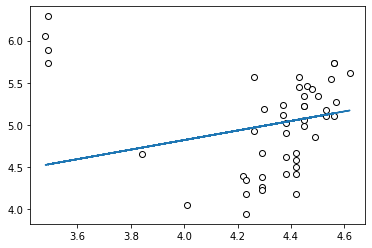

In [7]:
plt.scatter(X, Y, c='w', edgecolors='k')
plt.plot(X, line.evaluate_all(Xs))
plt.show()

In [8]:
line2 = pyinv.LinearModel(1)
line2.init_param()

loss_square = pyinv.ErrorLoss(pyinv.Square())
rho_func = pyinv.SoftQuantileFunc(pyinv.SoftAbs(0.001), 0.84)
wm = pyinv.WMMean(rho_func)
risk2 = pyinv.Risk(line2, loss_square, wm)

gd2 = pyinv.GradientDescent(risk2, h=0.1, n_iter=5000)
gd2.fit(Xs, Y)
print(gd2.K, line2.param)

5000 [-0.93875418  1.34092465]


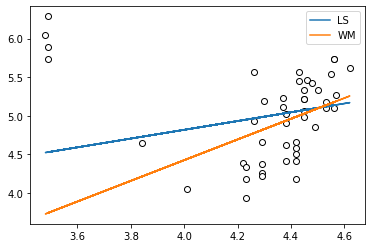

In [9]:
plt.scatter(X, Y, c='w', edgecolors='k')
plt.plot(X, line.evaluate_all(Xs), label='LS')
plt.plot(X, line2.evaluate_all(Xs), label='WM')
plt.legend()
plt.show()

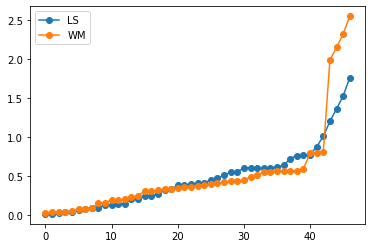

In [12]:
plt.plot(sorted(np.abs(line.evaluate_all(Xs) -Y)), marker='o', label='LS')
plt.plot(sorted(np.abs(line2.evaluate_all(Xs) -Y)), marker='o', label='WM')
plt.legend()
plt.show()